In [1]:
from robot.model import Robot, FakeRobot
import numpy as np
from utils.train_data import real_data_train, new_data_train
from utils.functions import ikine, mapping
from utils.camera import Camera

robô

In [2]:
robot = Robot("COM9") # Quando for fazer com o robô real, mude para Robot e passe a porta que ele está como argumento

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10
Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


In [3]:
robot.reset()

Comando enviado: 0:80, 1:130, 2:0, 3:100


In [22]:
robot.move_to(axis0=60)

Comando enviado: 0:60, 1:130, 2:0, 3:100


In [64]:
robot.close()

In [3]:
theta_tgt = ikine((0.2,0.2,0.12), l1=0.1, l2=0.124, l3=0.06)
print(theta_tgt)

[0.7853981633974483, 0.45540490516355225, -0.0, -0.2808719799641193, 0, 0]


In [9]:
theta_curr = np.radians([80, 130, 0, 100, 0, 0])

In [26]:
robot.reset()

Comando enviado: 0:80, 1:130, 2:0, 3:100


In [30]:
robot.rotate(axis2=-20)

Comando enviado: 0:80, 1:130, 2:0, 3:100


In [34]:
theta_curr

array([1.3962634 , 2.26892803, 0.        , 1.74532925, 0.        ,
       0.        ])

In [47]:
np.array(theta_tgt) - np.array(theta_curr)

array([-0.61086524, -1.81352312, -0.        , -2.02620123,  0.        ,
        0.        ])

In [ ]:
theta_out = mapping(theta_tgt, theta_curr, directions=[1, 1, -1, 1, 1, 1])
theta_out

array([ 45.        , -23.90722096,  80.        , -66.09277904,
         0.        ,   0.        ])

In [221]:
robot.reset()

Comando enviado: 0:80, 1:130, 2:0, 3:100


In [4]:
robot.move_to(80, 80, 50, 50)

Comando enviado: 0:80, 1:80, 2:50, 3:50


In [21]:
def new_mapping(theta_tgt, theta_curr, directions):
    dtheta = np.array(directions) * np.array(theta_tgt - theta_curr)
    theta_out = np.rad2deg(dtheta) + [80, 80, 50, 50, 0, 0]
    return theta_out

In [40]:
def max_range(z:int):
    if(z < 0.284):
        #ARMLEN_SQD = 0.080656 # normal = 0.284
        return np.sqrt(0.080656 - z**2)
    else:
        print('z maior do que braço')

max_range(0.12)

0.25740240869113873

In [161]:
max_range(0.2)

0.20163333057805696

In [226]:
robot.move_to(0, 90, 0, 0)

Comando enviado: 0:0, 1:90, 2:0, 3:0


In [41]:
robot.close()

In [220]:
robot.move_to(axis3=80)

Comando enviado: 0:90.0, 1:77.68717164079806, 2:80, 3:80


In [ ]:
robot.rotate(axis3=15)

Comando enviado: 0:90.0, 1:102.9591938855517, 2:161.2393565548952, 3:114.1985504404469


In [8]:
#theta_curr = np.radians(theta_out)

pos_tgt = (20, 0, 0.12)

theta_curr = np.radians([0, 90, 0, 0, 0, 0])

theta_tgt = ikine(pos_tgt, l1=0.1, l2=0.124, l3=0.06)
print('target (deg):', np.rad2deg(theta_tgt))
theta_out = mapping(theta_tgt)
print('out (deg): ', theta_out)
robot.move_to(theta_out[0], theta_out[1], theta_out[2], theta_out[3])

ValueError: math domain error

In [12]:
robot.close()

In [11]:
robot.move_to(80, 161.55, 171.62, 10)

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


In [20]:
robot.move_to(80, 80, 50, 50)

Comando enviado: 0:80, 1:80, 2:50, 3:50


In [227]:
robot.close()

camera

In [6]:
camera = Camera(1) # Estou colonado na minha outra câmera (pois tenho uma webcan no notebook e outra externa que estou capturando atualmente)
# Teste se a câmera, para sair pressione 'q'

In [4]:
camera.show_arucos()
# Se você escolheu a câmera errada dê um camera.release() e carregue a nova câmera.

In [5]:
camera.release()

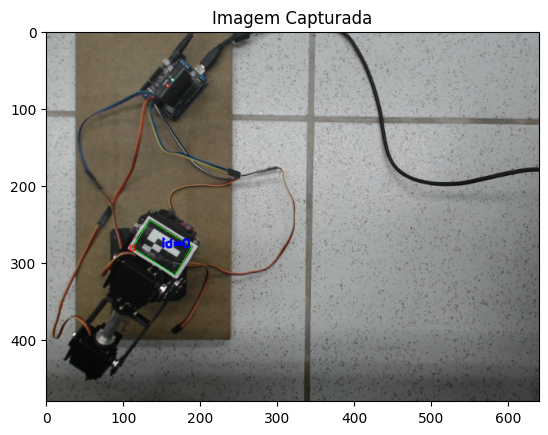

(112,
 281,
 134,
 245,
 189,
 279,
 167,
 316,
 150,
 280,
 77.02596964660685,
 None,
 640,
 480)

In [22]:
camera.get_aruco0_positions(plot_image=True, return_base64=False)

diagonal: 

- 77.33692520394123 px

- 77.02596964660685 px

real: ~= 6cm

In [23]:
77.24 / 6

12.873333333333333

treino

In [5]:
df_test = real_data_train(
    robot,
    camera,
    axis0_range=(0, 30),
    axis1_range=(0, 30),
    axis2_range=(0, 41),
    axis3_range=(0, 10),
    step=20,
    capture_image=False,
    show_image=True
)

df_test

IndexError: list index out of range

In [17]:
camera.release()

In [8]:
robot.close()

In [7]:
df_test = new_data_train(
    robot,
    camera,
    num_samples=5,
    capture_image=False,
    show_image=True
)

df_test

original: (140, 292, 0.12)
px: (495, 357, 0.12)	cm: (33.06332998675215, 23.845674354081854, 0.12)
Erro ao testar a posição: math domain error
['Traceback (most recent call last):\n', '  File "c:\\Users\\pedro\\Documents\\NOVOdeltadelta\\pog\\mlp-robot\\utils\\train_data.py", line 162, in new_data_train\n    theta = mapping(ikine(new_pos, l1=0.1, l2=0.124, l3=0.06))\n                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n', '  File "c:\\Users\\pedro\\Documents\\NOVOdeltadelta\\pog\\mlp-robot\\utils\\functions.py", line 43, in ikine\n    theta3 = -acos(c3)\n              ^^^^^^^^\n', 'ValueError: math domain error\n']


,theta0,theta1,theta2,theta3,x_camera,y_camera,x,y


In [28]:
from random import randint

randint(0, 640)

31

0/12


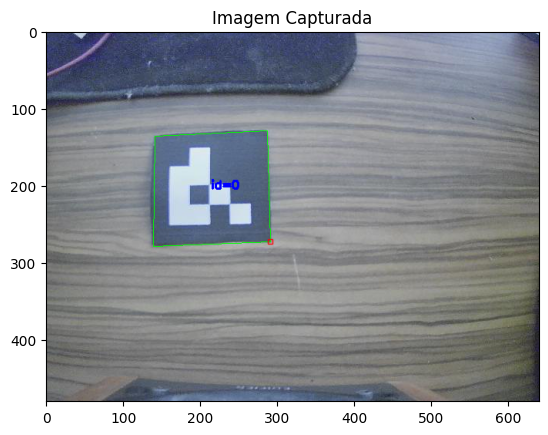

,axis0,axis1,axis2,axis3,x_pos,y_pos,b64_image
0,0,0,0,0,290,274,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
1,0,0,20,0,292,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
2,0,0,40,0,291,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
3,0,20,0,0,291,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
4,0,20,20,0,291,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
5,0,20,40,0,291,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
6,20,0,0,0,292,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
7,20,0,20,0,292,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
8,20,0,40,0,292,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
9,20,20,0,0,291,273,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...


In [9]:
df_test_image = real_data_train(
    robot,
    camera,
    axis0_range=(0, 30),
    axis1_range=(0, 30),
    axis2_range=(0, 41),
    axis3_range=(0, 10),
    step=20,
    capture_image=True,
    show_image=True
)

df_test_image